In [27]:
!pip install xgboost

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Notebook: Analisi e Modellazione per la Previsione del CO2

Questo notebook documenta il processo di analisi e modellazione per prevedere i livelli di CO2 sulla base di dati ambientali e di occupazione dell'ambiente.

---

## 1. Caricamento e Pre-elaborazione dei Dati

In questa sezione, viene caricato e preparato il dataset per l'analisi e il modeling. Questo include la lettura del file CSV, l'ispezione iniziale dei dati e la pulizia necessaria.

In [29]:
data = pd.read_csv('data9.csv', sep=';')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    1000 non-null   object
 1   co2     1000 non-null   object
 2   people  1000 non-null   int64 
 3   door    1000 non-null   int64 
 4   window  1000 non-null   int64 
 5   voc     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [31]:
data.head()

,time,co2,people,door,window,voc
0,2024-01-01 00:00:00,"388,5407183284845",0,0,0,"161,81883814641472"
1,2024-01-01 01:00:00,"391,2297719090259",0,0,0,"206,3269118121425"
2,2024-01-01 02:00:00,"406,02265333333776",1,0,0,"232,22856131739377"
3,2024-01-01 03:00:00,"389,32785505451346",0,0,0,"156,31475705315876"
4,2024-01-01 04:00:00,"390,9036241227504",0,0,0,"177,1278635915229"


In [7]:
data['time'] = pd.to_datetime(data['time'])
display(data.dtypes)

,0
time,datetime64[ns]
co2,object
people,int64
door,int64
window,int64
voc,object


In [32]:
# Convert 'co2' and 'voc' columns in the original data to numeric, handling commas as decimal separators
data['co2'] = data['co2'].str.replace(',', '.').astype(float)
data['voc'] = data['voc'].str.replace(',', '.').astype(float)

# Create a new dataframe by dropping the 'time' column
new_data = data.drop('time', axis=1)


# Display the info of the new dataframe to confirm data types
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     1000 non-null   float64
 1   people  1000 non-null   int64  
 2   door    1000 non-null   int64  
 3   window  1000 non-null   int64  
 4   voc     1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


## 2. Suddivisione dei Dati

Il dataset viene suddiviso in training set e test set. Il set di addestramento viene utilizzato per insegnare al modello le relazioni nei dati, mentre il set di test viene utilizzato per valutare le prestazioni del modello su dati che non ha mai visto prima, garantendo una valutazione più oggettiva.

In [33]:
# from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
# Assuming 'co2' is the target variable
X = new_data.drop('co2', axis=1)
y = new_data['co2']

# Set a random seed for reproducibility
seed = 42

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 4)
Shape of X_test: (300, 4)
Shape of y_train: (700,)
Shape of y_test: (300,)


## 3. Addestramento dei Modelli

In questa sezione sono stati addestrati due diversi modelli di regressione per prevedere i livelli di CO2: un modello Random Forest e un modello XGBoost Regressor.

### Random Forest

In [34]:
# from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# Using the same random state as before
model = RandomForestRegressor(criterion="squared_error", n_estimators=300, random_state=seed)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Modello Random Forest costruito e addestrato con successo.")

Modello Random Forest costruito e addestrato con successo.


In [35]:
# from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 18.961134143699063
R-squared: 0.7823773368146194
Root Mean Squared Error (RMSE): 4.354438441831399


In [36]:
# Get the feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the importances in descending order
sorted_importance_series = importance_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(sorted_importance_series)

Feature Importances:
people    0.822598
voc       0.173548
door      0.001980
window    0.001874
dtype: float64


### XgBoosting

In [37]:
# Initialize the XGBoost Regressor model
# You can adjust the hyperparameters here
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, random_state=seed)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

print("Modello XGBoost costruito e addestrato con successo.")

Modello XGBoost costruito e addestrato con successo.


In [38]:
#from sklearn.metrics import mean_squared_error, r2_score
#import numpy as np

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE) for XGBoost
rmse_xgb = np.sqrt(mse_xgb)

# Display the results for XGBoost
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb}")

XGBoost Mean Squared Error (MSE): 16.136859827496423
XGBoost R-squared: 0.8147923861254927
XGBoost Root Mean Squared Error (RMSE): 4.017071050839955


In [39]:
# Get the feature importances from the trained XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Get the names of the features (using X.columns from the training data)
feature_names = X.columns

# Create a pandas Series for better visualization
xgb_importance_series = pd.Series(xgb_feature_importances, index=feature_names)

# Sort the importances in descending order
sorted_xgb_importance_series = xgb_importance_series.sort_values(ascending=False)

# Display the sorted feature importances for XGBoost
print("XGBoost Feature Importances:")
print(sorted_xgb_importance_series)

XGBoost Feature Importances:
people    0.940943
voc       0.029735
window    0.015958
door      0.013363
dtype: float32


## Confronto e Scelta del Modello

Confrontando le metriche di performance ottenute sui dati di test per i due modelli Random Forest ed XGBoost per la previsione della CO2, si può osservare che il modello **XGBoost** ha ottenuto metriche migliori :

*   **Random Forest:**
    *   Mean Squared Error (MSE): `18.96`
    *   R-squared: `0.78`
    *   Root Mean Squared Error (RMSE): `4.35` (calcolato come sqrt(18.96))

*   **XGBoost:**
    *   Mean Squared Error (MSE): `16.14`
    *   R-squared: `0.81`
    *   Root Mean Squared Error (RMSE): `4.02`


In [40]:
# Define the specific scenario
people_value = 3
voc_value = 250

# Create a DataFrame for the new data point, ensuring column names match the training data
new_data_point = pd.DataFrame({
    'people': [people_value],
    'door': [0],  # Add 'door' column with a default value
    'window': [0], # Add 'window' column with a default value
    'voc': [voc_value]
})

# Ensure the order of columns in new_data_point matches the order of columns in X_train
new_data_point = new_data_point[X_train.columns]

# Make prediction using the Random Forest model
predicted_co2_rf = model.predict(new_data_point)

# Make prediction using the XGBoost model
predicted_co2_xgb = xgb_model.predict(new_data_point)

# Display the predictions
print(f"Predicted CO2 (Random Forest): {predicted_co2_rf[0]:.3f}")
print(f"Predicted CO2 (XGBoost): {predicted_co2_xgb[0]:.3f}")

Predicted CO2 (Random Forest): 425.367
Predicted CO2 (XGBoost): 426.457


In [17]:
!pip install shap

In [42]:
import shap

## 5. Interpretazione del Modello con SHAP (SHapley Additive exPlanations)

Questa sezione è dedicata all'interpretazione del modello XGBoost utilizzando la libreria SHAP.

SHAP aiuta a capire l'importanza globale di ciascuna feature e come ciascuna feature contribuisce a specifiche previsioni individuali.

Sono stati esplorati diversi diagrammi:

In [44]:
# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

In [49]:
# Calculate SHAP values for the test set using the explainer
# Use explainer.shap_values(X_test) to get a numpy array for dependence plots
shap_values = explainer.shap_values(X_test)

* Il **SHAP Summary Plot a barre** visualizza l'importanza globale di ciascuna feature. Le feature sono ordinate in base al valore medio assoluto dei loro valori SHAP (Mean |SHAP value|), che indica l'impatto medio della feature sull'ampiezza della previsione del modello.

Nel nostro caso, il grafico mostra chiaramente che:

*   **'people'** è la feature più impattante, con un valore medio assoluto di SHAP significativamente più alto rispetto alle altre.
*   **'voc'** è la seconda feature più importante.
*   **'window'** e **'door'** hanno un impatto molto minore sulla previsione del CO2 da parte del modello.

Questo conferma che il numero di persone e i livelli di VOC sono i fattori principali che influenzano le previsioni del modello sui livelli di CO2.

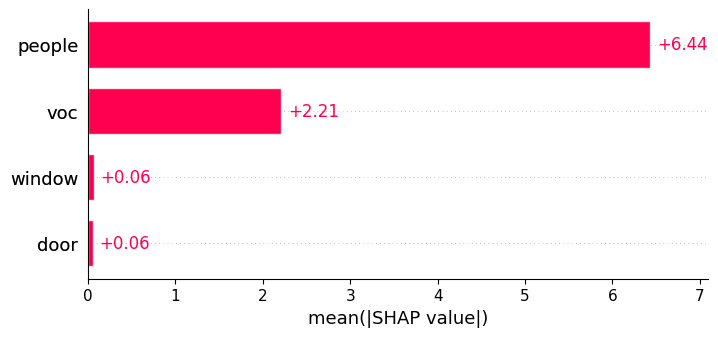

In [46]:
# Absolute mean SHAP
shap.plots.bar(shap_values)

*   Il **SHAP Beeswarm Plot** fornisce una visione più dettagliata rispetto al grafico a barre, mostrando la distribuzione dei valori SHAP per ciascuna feature su tutto il dataset di test.

    *   L'asse x rappresenta il valore SHAP (l'impatto sulla previsione del modello).
    *   L'asse y elenca le feature, ordinate per importanza (come nel grafico a barre).
    *   Ogni punto sul grafico rappresenta un'istanza dal dataset di test.
    *   Il colore di ciascun punto indica il valore della feature per quella specifica istanza (blu = valore basso, rosso = valore alto).

     Si osserva:

    *   Per la feature **'people'**: Si notano distinti raggruppamenti di punti SHAP. I punti blu (basso numero di persone) si addensano a sinistra (impatto negativo o basso sul CO2 previsto), mentre i punti rossi e viola (alto numero di persone) si spostano progressivamente verso destra (impatto positivo e maggiore sul CO2 previsto). Questo conferma che un numero maggiore di persone porta a previsioni di CO2 più elevate.
    *   Per la feature **'voc'**: I punti SHAP per 'voc' tendono ad addensarsi vicino allo zero, indicando che l'impatto di 'voc' sulla previsione è generalmente meno variabile rispetto a 'people'. Tuttavia, si osserva una tendenza: i punti blu (basso valore di VOC) si trovano leggermente più a sinistra (impatto negativo o minore sul CO2 previsto), mentre i punti rossi (alto valore di VOC) si trovano leggermente più a destra (impatto positivo o maggiore sul CO2 previsto).
    *   Per **'window'** e **'door'**: L'addensamento dei punti SHAP vicino allo zero per queste feature conferma il loro impatto relativamente basso sulla previsione del CO2, come già visto nel grafico a barre.

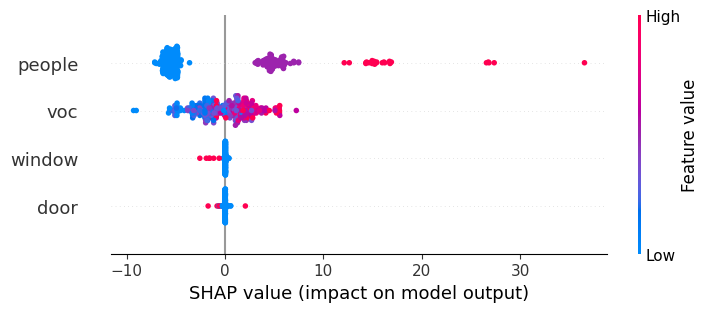

In [47]:
# Generate the SHAP beeswarm plot using the Explanation object
shap.plots.beeswarm(shap_values)

*   **SHAP Dependence Plot**: Illustra la relazione tra il valore di una feature e il suo impatto sulla previsione, spesso mostrando anche interazioni con altre feature.

    Nel grafico di dipendenza per la feature **'people'** (colorato in base alla feature 'voc'), osserviamo quanto segue:

    *   L'asse x rappresenta il valore della feature 'people'.
    *   L'asse y rappresenta il valore SHAP per 'people' (l'impatto di 'people' sulla previsione).
    *   Il colore dei punti indica il valore della feature 'voc' per quella specifica istanza (blu = VOC basso, rosso = VOC alto).

    C'è una chiara tendenza:
    *   Per **valori bassi di 'people'** (a sinistra sull'asse x), i punti si addensano in basso sull'asse y (basso impatto sul CO2 previsto), e sono prevalentemente blu (basso VOC).
    *   Man mano che i **valori di 'people' aumentano** (spostandosi verso destra sull'asse x), i punti si spostano verso l'alto sull'asse y (maggiore impatto sul CO2 previsto).

    La colorazione per 'voc' suggerisce un'interazione: a parità di numero di persone, istanze con valori di 'voc' più alti (punti rossi) tendono ad avere un impatto leggermente maggiore (punti posizionati leggermente più in alto o più a destra) sulla previsione della CO2 rispetto a istanze con valori di 'voc' più bassi (punti blu). Questo indica che l'effetto del numero di persone sulla CO2 previsto può essere influenzato anche dal livello di VOC.

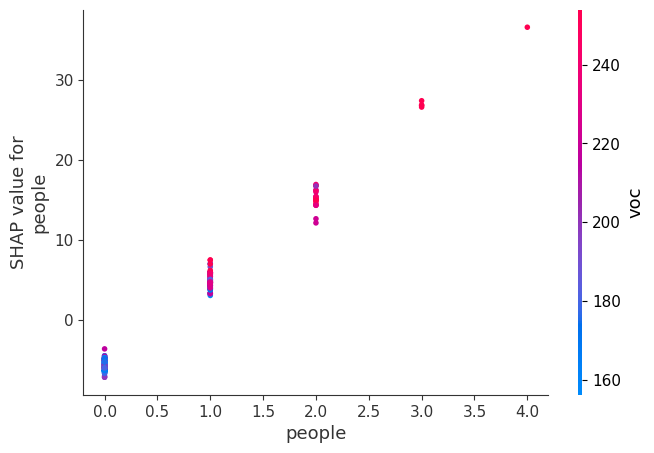

In [50]:
# Get the index of the feature with the highest importance (likely 'people')
# Assuming 'people' is the first column based on previous output, confirm with X_test.columns if needed
people_feature_index = X_test.columns.get_loc('people')

# Generate the SHAP dependence plot for the 'people' feature
# Pass shap_values as a numpy array and X_test as the feature values
shap.dependence_plot(people_feature_index, shap_values, X_test, display_features=X_test)

Analizziamo ora il SHAP dependence plot per la feature **'voc'**, colorato in base alla feature 'people'. Questo ci aiuta a capire come l'impatto di 'voc' sulla previsione del CO2 sia influenzato dal numero di persone.

*   L'asse x rappresenta il valore della feature 'voc'.
*   L'asse y rappresenta il valore SHAP per 'voc' (l'impatto di 'voc' sulla previsione).
*   Il colore dei punti indica il valore della feature 'people' per quella specifica istanza (blu/celeste = basso numero di persone, rosso/viola = alto numero di persone).

Come hai osservato:

*   Per **valori bassi di 'voc'** (a sinistra sull'asse x), i punti tendono ad avere valori SHAP più bassi e i colori variano, ma con una prevalenza di punti celeste.
*   Man mano che i **valori di 'voc' aumentano** (spostandosi verso destra sull'asse x), i punti tendono ad avere valori SHAP più alti.

La distribuzione dei punti e la loro colorazione (che va dal celeste/blu in basso a sinistra al viola/rosa in alto a destra) suggeriscono una chiara interazione: l'impatto positivo di valori di 'voc' più alti sulla previsione del CO2 diventa più pronunciato (maggiore valore SHAP sull'asse y) quando il numero di persone ('people') è più alto (punti viola/rosa).

In sintesi, mentre un aumento del VOC di per sé tende ad aumentare la previsione del CO2, l'entità di questo aumento è maggiore quando ci sono più persone nella stanza. Questo conferma l'interazione tra 'voc' e 'people' che avevamo già intuito.

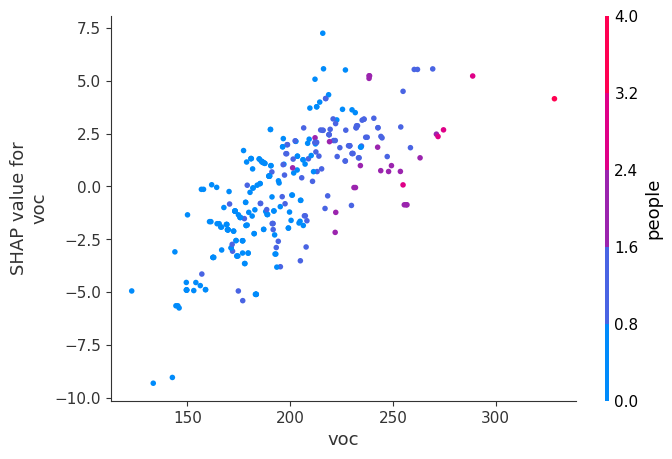

In [51]:
# Generate the SHAP dependence plot for 'voc', colored by 'people'
shap.dependence_plot('voc', shap_values, X_test, interaction_index='people', display_features=X_test)

*   **SHAP Waterfall Plot**: Dettaglia come ogni feature spinge la previsione da un valore base (valore atteso) al valore previsto finale per una singola istanza.

*   **SHAP Waterfall Plot**: Dettaglia come ogni feature spinge la previsione da un valore base (valore atteso medio delle previsioni sul dataset di test) al valore previsto finale per una singola istanza.

    Nel grafico a cascata che abbiamo generato per un'istanza specifica (quella selezionata con `X_test.iloc[[25]]`), possiamo vedere l'impatto di ciascuna feature sulla previsione.

    Si osserva:
    *   La feature **'people'** ha un impatto significativo e positivo, spingendo la previsione del CO2 verso l'alto rispetto al valore base.
    *   La feature **'voc'** ha un impatto sul valore di CO2, spingendo la previsione leggermente verso il basso per questa specifica istanza.
    *   Altre feature, come 'door' e 'window', hanno un impatto molto ridotto, se non nullo.

    Partendo dal valore base (`E[f(X)]`), l'effetto combinato di ciascuna feature porta al valore di previsione finale (`f(x)`).

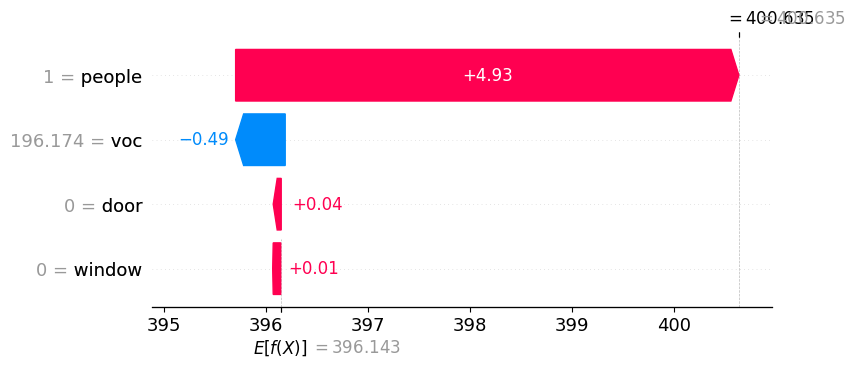

In [52]:
# Select a single instance from the test set (e.g., the second instance)
# You can change the index to select a different instance
instance_to_explain = X_test.iloc[[25]]

# Calculate SHAP values for the single instance using the explainer
shap_values_instance = explainer(instance_to_explain)

# Generate the SHAP waterfall plot for the single instance
shap.plots.waterfall(shap_values_instance[0])

*   **SHAP Force Plot**: Simile al waterfall plot, il force plot visualizza l'impatto di ciascuna feature sulla previsione per una singola istanza. Mostra come le feature "spingono" la previsione dal valore base (`explainer.expected_value`) al valore previsto finale (`f(x)`).

    *   Le feature con un impatto positivo (che aumentano la previsione) sono mostrate in rosso.
    *   Le feature con un impatto negativo (che diminuiscono la previsione) sono mostrate in blu.
    *   La dimensione di ciascuna "forza" (barra colorata) indica l'entità dell'impatto della feature.


In [57]:
# Select a single instance from the test set (e.g., the second instance)
# You can change the index to select a different instance
instance_to_explain = X_test.iloc[[100]]

# Calculate SHAP values for the single instance
shap_values_instance = explainer.shap_values(instance_to_explain)

# Generate the SHAP force plot for the single instance
# shap.initjs() is needed to display the plot in some environments
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_instance, instance_to_explain)